# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from  sklearn  import  set_config
set_config(display='diagram')

# Custom functions

In [3]:
def save_dataset(nome_file, file):
    with open(nome_file +'.pkl', 'wb') as f:
        pickle.dump(file, f)
    return

In [4]:
def dataset_parameters(df,target):
    df_features = df.drop([target], axis=1)
    data_type_numerical = ['int64', 'float64']
    data_type_object = ['object', 'bool', 'category']
    data_type_date = ['datetime64']
    categorical_features  = list(filter(lambda x: df_features[x].dtype in data_type_object, df_features.columns))
    numerical_features = list(filter(lambda x: df_features[x].dtype in data_type_numerical, df_features.columns))
    date_features = list(filter(lambda x: df_features[x].dtype in data_type_date, df_features.columns))
    all_features  = numerical_features  + categorical_features + date_features 
    return categorical_features, numerical_features, date_features, all_features,target  

In [5]:
def dataframe_with_null(df):
    percentuale = round(df[df.isnull().any(axis=1)].shape[0]/df.shape[0]*100, 2)
    print('The dataset has {}% of records with at least one NaN value'.format(percentuale))

In [6]:
def unique_values_dataframe(df, categorical_features):
    result = {}
    for col in categorical_features:
        unique_values = df[col].unique()
        result[col] = unique_values.tolist()        
    unique_df = pd.DataFrame.from_dict(result, orient='index')
    unique_df = unique_df.transpose()
    return unique_df   

# Import dataset and visualize properties

In [7]:
df = pd.read_csv('penguins.csv')

In [8]:
df.sample(10, random_state=13)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
333,Biscoe,51.5,16.3,230.0,5500.0,MALE,Gentoo
101,Biscoe,41.0,20.0,203.0,4725.0,MALE,Adelie
67,Biscoe,41.1,19.1,188.0,4100.0,MALE,Adelie
33,Dream,40.9,18.9,184.0,3900.0,MALE,Adelie
251,Biscoe,42.8,14.2,209.0,4700.0,FEMALE,Gentoo
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE,Adelie
12,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,Adelie
136,Dream,35.6,17.5,191.0,3175.0,FEMALE,Adelie
221,Biscoe,50.0,16.3,230.0,5700.0,MALE,Gentoo
127,Torgersen,41.5,18.3,195.0,4300.0,MALE,Adelie


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Remove unnecessary records

In [10]:
categorical_features, numerical_features, date_features, all_features, target = dataset_parameters(df,'species')

In [11]:
dataframe_with_null(df)

The dataset has 2.91% of records with at least one NaN value


In [12]:
df[df.isnull().any(axis=1)]

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
8,Torgersen,34.1,18.1,193.0,3475.0,NaN,Adelie
9,Torgersen,42.0,20.2,190.0,4250.0,NaN,Adelie
10,Torgersen,37.8,17.1,186.0,3300.0,NaN,Adelie
11,Torgersen,37.8,17.3,180.0,3700.0,NaN,Adelie
47,Dream,37.5,18.9,179.0,2975.0,NaN,Adelie
246,Biscoe,44.5,14.3,216.0,4100.0,NaN,Gentoo
286,Biscoe,46.2,14.4,214.0,4650.0,NaN,Gentoo
324,Biscoe,47.3,13.8,216.0,4725.0,NaN,Gentoo
339,Biscoe,NaN,NaN,NaN,NaN,NaN,Gentoo


In [13]:
df = df.dropna()

In [14]:
unique_values_dataframe(df, categorical_features).fillna('')

,island,sex
0,Torgersen,MALE
1,Biscoe,FEMALE
2,Dream,_


In [15]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [16]:
df[df['sex']=='_']

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
336,Biscoe,44.5,15.7,217.0,4875.0,_,Gentoo


In [17]:
df.drop(labels=[336], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   culmen_length_mm   333 non-null    float64
 2   culmen_depth_mm    333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
 6   species            333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [19]:
df = df.reset_index(drop=True)

In [20]:
df

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
3,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie
4,Torgersen,39.3,20.6,190.0,3650.0,MALE,Adelie
...,...,...,...,...,...,...,...
328,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,Gentoo
329,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,Gentoo
330,Biscoe,50.4,15.7,222.0,5750.0,MALE,Gentoo
331,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,Gentoo


# Save DataFrame

In [21]:
save_dataset('penguins_df', df)

# Visualize the relationship among numerical features

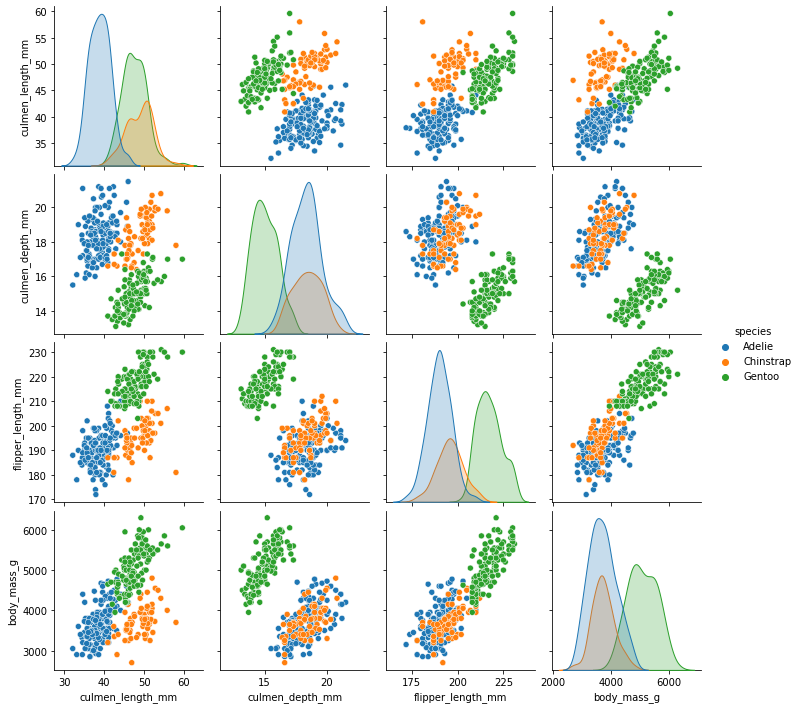

In [22]:
plt.plot
sns.pairplot(df, hue="species")

# Transform  categorical and numerical  features

In [23]:
transformers = [    
    ('one', OneHotEncoder(), categorical_features),
    ('scale', StandardScaler(), numerical_features)
]

In [24]:
ct = ColumnTransformer(transformers)

In [25]:
ct

ColumnTransformer(transformers=[('one', OneHotEncoder(), ['island', 'sex']),
                                ('scale', StandardScaler(),
                                 ['culmen_length_mm', 'culmen_depth_mm',
                                  'flipper_length_mm', 'body_mass_g'])])

In [26]:
df_transformed = ct.fit_transform(df)

# Apply labels to target

In [27]:
le = LabelEncoder()

In [28]:
df_target = le.fit_transform(df[target])

# Save X and y dataset

In [29]:
dataset_X_y = df_transformed, df_target

In [30]:
save_dataset('penguins_dataset', dataset_X_y)

In [31]:
dataset_X_y

(array([[ 0.        ,  0.        ,  1.        , ...,  0.7807321 ,
         -1.42675157, -0.56847478],
        [ 0.        ,  0.        ,  1.        , ...,  0.11958397,
         -1.06947358, -0.50628618],
        [ 0.        ,  0.        ,  1.        , ...,  0.42472926,
         -0.42637319, -1.1903608 ],
        ...,
        [ 1.        ,  0.        ,  0.        , ..., -0.74499437,
          1.50292796,  1.91906927],
        [ 1.        ,  0.        ,  0.        , ..., -1.20271231,
          0.78837197,  1.23499466],
        [ 1.        ,  0.        ,  0.        , ..., -0.54156417,
          0.85982757,  1.48374906]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   

# Save processed DataFrame

In [32]:
df_processed = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())

AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names_out'

In [ ]:
df_processed.columns = [col.split('__')[1] for col in df_processed.columns]

In [ ]:
df_processed = pd.concat([df_processed, pd.DataFrame(df_target, columns=['species'])], axis=1)

In [ ]:
save_dataset('penguins_df_processed', df_processed)

In [ ]:
df_processed.sample(10)

# Save target classes dictionary

In [ ]:
class_dict = dict(zip(le.transform(le.classes_), le.classes_))

In [ ]:
save_dataset('penguins_species_classes', class_dict)

In [ ]:
class_dict